# Spotify Project! What i will do in this project:

**EDA:** Trends in tempo, energy, danceability by year or genre

**Clustering:** Group songs by "vibe"

**Recommendation system:** Content-based filtering based on what "vibe" its in

In [47]:
#IMPORT ALL LIBRARYS

import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Columns: 

**genre**: what genre the song is 

**artist_name**: the artist name

**track_name**: the song name

**track_id**: the song id (unique to each song)

**popularity**: A score from 0 to 100 (higher = more popular), reflecting a track’s recent streaming counts and listener engagement.

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high
confidence the track is acoustic.

**danceability**: It describes how suitable a track is for dancing based on a combination of musical
elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least
danceable and 1.0 is most danceable.

**duration_ms**: Length of the track in milliseconds. Divide by 1,000 to convert to seconds

**energy**: This is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a
Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic
range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as
instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the
instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above
0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key**: Integer (0–11) representing the musical key of the track using pitch class notation (0 = C, 1 = C♯/D♭, etc.). -1 indicates undetected.

**liveness**: Float (0.0–1.0): probability that a track was performed live. Values >0.8 typically indicate live recordings.

**loudness**: Overall loudness of the track in decibels (dB). Typical values range from about –60 to 0 dB

**mode**: Musical modality: 1 = major, 0 = minor.

**speechiness**: It detects the presence of spoken words in a track. The more exclusively speech-like the
recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66
describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe
tracks that may contain both music and speech, either in sections or layered, including such cases as rap
music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo**: Estimated tempo in beats per minute (BPM).

**time_signature**: Beats per bar (time signature), usually between 3 and 7 (e.g. 4 = 4/4 time)

**valence**: Float (0.0–1.0): musical positiveness conveyed by the track (happy vs. negative).


## EDA

Any missingness or duplicate values

In [ ]:
#check for duplicate rows
print(len(df), len(df['track_id'].unique()))

232725 176774


In [62]:
#remove duplicates
df_nodupe = df.drop_duplicates(subset=['track_id']).reset_index()
df_nodupe.head(3)

,index,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


In [63]:
#only 1 nan value in whole dataset and for column track_name
df_nodupe.isna().sum()

index               0
genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [64]:
#drop the 1 nan row
df_nodupe = df_nodupe.dropna(subset=['track_name'])

### Univariate Analysis

In [ ]:
fig = px.histogram(df_nodupe, x='danceability')
fig.show()

In [ ]:
fig = px.histogram(df_nodupe, x='liveness')
fig.show()

In [ ]:
fig = px.histogram(df_nodupe, x='popularity')
fig.show()

### Bivariate Analysis

In [ ]:
#Semi trend, the longer the song, the less popular.
fig = px.scatter(df_nodupe.sample(10000), x='duration_ms', y='popularity')
fig.show()

In [ ]:
#Clear trend! more danceable songs are percieved as happier.
fig = px.scatter(df_nodupe.sample(10000), x='danceability', y='valence')
fig.show()

### Aggregate Statistics

In [43]:
#Reggae is considered the happiest music genre followed by children's music. While opera and soundtrack is considered the saddest. 
#(soundtrack genre is the collection of music used in a film, television show, video game, or other media)
df_nodupe.groupby('genre')['valence'].mean().sort_values(ascending=False)

genre
Reggae              0.679775
Children's Music    0.675946
Reggaeton           0.659990
Ska                 0.647291
Blues               0.580323
Country             0.534908
Dance               0.517666
Rock                0.513840
Jazz                0.510294
Pop                 0.505833
Soul                0.484325
Hip-Hop             0.462159
Indie               0.452099
Alternative         0.448935
Movie               0.447771
R&B                 0.444941
Rap                 0.441758
Anime               0.441682
Children’s Music    0.438589
Folk                0.427025
Comedy              0.412648
Electronic          0.385348
A Capella           0.328724
World               0.295178
Classical           0.215561
Opera               0.189864
Soundtrack          0.112975
Name: valence, dtype: float64

In [45]:
#Ska, electronic, and alternative are notably the highest genre's in energy. Classical and Opera are the lowest (this makes sense)
df_nodupe.groupby('genre')['energy'].mean().sort_values(ascending=False)

genre
Ska                 0.836923
Reggaeton           0.748457
Electronic          0.739263
Alternative         0.713933
Children’s Music    0.712646
Dance               0.696151
Comedy              0.676169
Rock                0.674699
Anime               0.665320
Pop                 0.660160
Hip-Hop             0.645527
Country             0.635351
Reggae              0.635303
Rap                 0.617395
Blues               0.603349
Indie               0.602040
R&B                 0.554612
Soul                0.548025
World               0.516867
Folk                0.479069
Jazz                0.463462
Children's Music    0.396891
Movie               0.370647
A Capella           0.250313
Soundtrack          0.224188
Classical           0.175302
Opera               0.168779
Name: energy, dtype: float64

## Ultimate goal is to classify all songs to specific 'vibes' or 'moods' so that I can later use them in plotly dash

In [65]:
#Preprocess our variables we are gonna use to group each song into a 'mood'/'vibe'

features = df_nodupe[['valence', 'energy', 'danceability', 'acousticness', 'tempo']]
X_scaled = StandardScaler().fit_transform(features)

In [70]:
#Use a kmeans clustering to make 6 clusters (one for each 'mood')

kmeans = KMeans(n_clusters=6, random_state=42)
df_nodupe['vibe_cluster'] = kmeans.fit_predict(X_scaled)

In [71]:
#Checking each cluster to see what vibe they most likely belong to.

df_nodupe.groupby('vibe_cluster')[['valence', 'energy', 'danceability', 'acousticness', 'tempo']].mean()

,valence,energy,danceability,acousticness,tempo
vibe_cluster,,,,,
0,0.471913,0.410147,0.592664,0.761915,108.862079
1,0.699546,0.767177,0.584623,0.156224,157.234858
2,0.343427,0.709169,0.568431,0.139643,102.981616
3,0.134588,0.161700,0.278197,0.875835,100.295095
4,0.283588,0.680112,0.428137,0.179871,153.935970
5,0.743752,0.690163,0.732019,0.196069,106.622724


### Cluster Interpretations

### Cluster 0:
>Valence: 0.47 → neutral
>
>Energy: 0.41 → relaxed
>
>Danceability: 0.59 → somewhat danceable
>
>Acousticness: 0.76 → very acoustic
>
>Tempo: 108 BPM → moderate
>

**Mood/Vibe:**
>"Chill & Acoustic"
>
>Mellow, slightly upbeat acoustic tracks — coffee shop vibes, soft indie.

<br>

### Cluster 1:

>Valence: 0.70 → happy
>
>Energy: 0.77 → very energetic
>
>Danceability: 0.58 → somewhat danceable
>
>Acousticness: 0.16 → mostly electronic/instrumental
>
>Tempo: 157 BPM → very fast

**Mood/Vibe:**
>"Hype / Workout"
>
>High-energy, positive tracks — gym, running, EDM, fast pop.

<br>

### Cluster 2:

>Valence: 0.34 → a bit sad
>
>Energy: 0.71 → energetic
>
>Danceability: 0.57 → moderate
>
>Acousticness: 0.14 → electronic
>
>Tempo: 103 BPM → medium

**Mood/Vibe:**
>"Moody Intensity"
>
>Emotionally heavy but energetic — alt rock, rap, intense vibes.

<br>

### Cluster 3:

>Valence: 0.13 → very sad
>
>Energy: 0.16 → very calm
>
>Danceability: 0.28 → low
>
>Acousticness: 0.88 → very acoustic
>
>Tempo: 100 BPM → slow

**Mood/Vibe:**

>"Sad & Soft"
>
>Depressing or emotional acoustic tracks — breakup music, slow ballads.

<br>

### Cluster 4:

>Valence: 0.28 → sad
>
>Energy: 0.68 → high
>
>Danceability: 0.43 → low-moderate
>
>Acousticness: 0.18 → electronic
>
>Tempo: 154 BPM → fast

**Mood/Vibe:**

>"Angsty / Intense"
>
>Sad but energetic and fast — punk rock, fast rap, maybe rage-type music.

<br>

### Cluster 5:

>Valence: 0.74 → happy
>
>Energy: 0.69 → upbeat
>
>Danceability: 0.73 → very danceable
>
>Acousticness: 0.20 → electronic
>
>Tempo: 106 BPM → moderate

**Mood/Vibe:**

>"Feel-Good / Dance"
>
>Upbeat and fun — feel-good pop, party music, mainstream dance.

### Visualizing Clusters

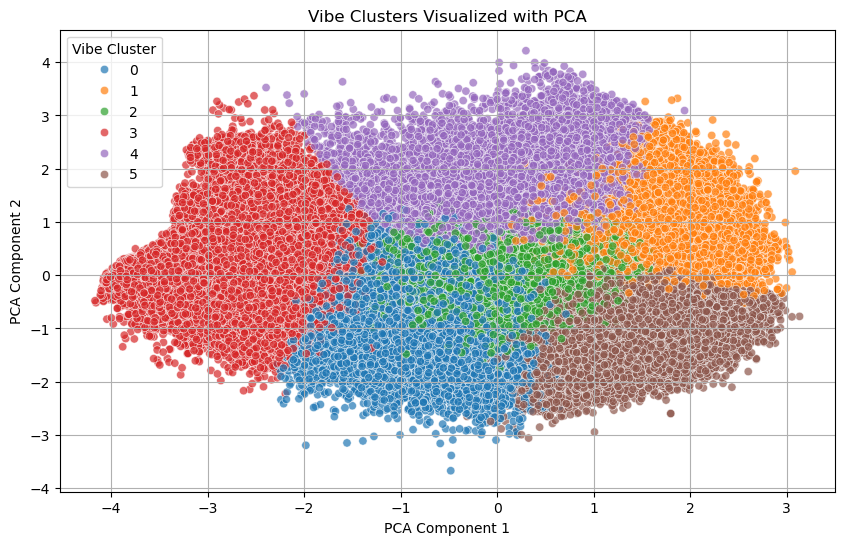

In [68]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df_pca = df_nodupe.copy()

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the DataFrame
df_pca['pca1'] = X_pca[:, 0]
df_pca['pca2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='vibe_cluster', palette='tab10', alpha=0.7)
plt.title('Vibe Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Vibe Cluster')
plt.grid(True)
plt.show()

In [ ]:
#Renaming 'vibe_cluster' column values to reflect actual vibe/mood

df_nodupe['vibe_cluster'] = df_nodupe['vibe_cluster'].replace({0:'Chill & Acoustic', 1:'Hype/Workout', 
                                              2:'Moody Intensity', 3:'Sad & Soft', 
                                              4:'Angry/Intensity', 5:'Feel Good/Dance'})
df_nodupe.head(3)

,index,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,vibe_cluster
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814,Hype/Workout
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816,Hype/Workout
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368,Chill & Acoustic
